In [1]:
%matplotlib inline
import numpy as np
# import matplotlib.font_managermn as fm
import matplotlib.pyplot as plt
# 配置中文
# # 添加字体 
# fm.fontMnager.addfont('C:/Windows/Fonts/SimHei.ttf')
# 安装好字体后可以正常设置
plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是符号'-'显示为方块的问题

import pandas as pd
from py2neo import Graph, Node, Relationship
import re

d:\Anaconda_other\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\Anaconda_other\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import ast

df_all = pd.read_csv("../../数据集/处理后的数据集/user_data_2_C4.csv")
# 将存储的字符串值修改成列表形式
df_c = df_all[['ACTORS','DIRECTORS','GENRES','LANGUAGES','REGIONS']].copy()

# 将列中的字符串转换为列表，处理NaN值
df_all['ACTORS'] = df_c['ACTORS'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['DIRECTORS'] = df_c['DIRECTORS'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['GENRES'] = df_c['GENRES'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['REGIONS'] = df_c['REGIONS'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['LANGUAGES'] = df_c['LANGUAGES'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

df_all

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,COMMENT_TIME,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS,TOKENIZED_CONTENT,RATING_HOUR,COMMENT_HOUR,length,C
0,1.941952e+09,018b88b05ec053e03acf97920e641115,1291544,5.0,2019-09-06 20:19:04,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,20.0,NaN,0,0.000000
1,1.940096e+09,0617937403be10c1b6962686e97198b5,1291544,5.0,2019-09-05 08:44:38,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,8.0,NaN,0,0.000000
2,1.941972e+09,08723142276d403448980d73b1eb6e78,1291544,4.0,2019-09-06 20:40:57,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,20.0,NaN,0,0.000000
3,1.940079e+09,0ac1940db193217a5351d957ac06e7e1,1291544,4.0,2019-09-05 08:16:52,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,8.0,NaN,0,0.000000
4,1.938949e+09,0ae3d72e2c2164f5060b17226b6f5710,1291544,5.0,2019-09-04 10:00:22,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,10.0,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230098,1.917904e+09,8e29154e90cfea1e5a291815a81bdc6f,34782320,3.0,2019-08-20 18:57:42,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,18.0,NaN,0,0.000000
4230099,1.920864e+09,a3911cd0925a298a8f6c23fd73240b20,34782320,1.0,2019-08-22 20:44:35,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,20.0,NaN,0,0.000000
4230100,1.916191e+09,a8dec3dc19b0a730d99e1affe5bce64f,34782320,1.0,2019-08-19 16:42:50,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,16.0,NaN,0,0.022849
4230101,1.915868e+09,c57f355b1b45db04d2a2a1f7f8b5b083,34782320,3.0,2019-08-19 12:47:06,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,12.0,NaN,0,0.000946


In [4]:
com_user = pd.read_csv("../../数据集/处理后的数据集/user_activative_C4.csv")
com_user

,USER_MD5,RATING_ID_COUNT,COMMENT_ID_COUNT,monthly_COUNT,GENRES_COUNT,C
0,b05ae0036abc8f113d7e491f502a7fa8,2511,728,647.800000,29,0.709523
1,535e6f7ef1626bedd166e4dfa49bc0b4,4339,976,40.572519,31,0.640749
2,425889580eb67241e5ebcd9f9ae8a465,4107,1012,33.240260,31,0.635399
3,3917c1b1b030c6d249e1a798b3154c43,4292,772,38.075188,31,0.605287
4,27a0515251ae7b335fc40a6a01ba34c3,2682,338,604.000000,31,0.577249
...,...,...,...,...,...,...
79170,b05fc87d04a2e41c828d2b14ce4714ed,1,0,1.000000,1,0.000142
79171,b045d6cac2e16baf1ea6a8c293b81bb0,1,0,1.000000,1,0.000142
79172,2cbf757add980c60f3dd178fd635fb6d,1,0,1.000000,1,0.000142
79173,2ccde3ca7ad0903ffe9e4a0b4d53d3bb,1,0,1.000000,1,0.000142


In [5]:
data = 6000
com_user[data:(data+20)]

,USER_MD5,RATING_ID_COUNT,COMMENT_ID_COUNT,monthly_COUNT,GENRES_COUNT,C
6000,85d613b5542ecdd2aa2d95eb127a65ba,110,19,1.131579,23,0.019845
6001,732b07ce149cbf22f0b97a34b71df1b2,101,21,4.692308,23,0.019843
6002,e80621d2cc7e1dd7e3dcc7744ee28f25,101,22,1.217822,20,0.019842
6003,4ee5d3493331ec1099ee5c66bb518d43,100,22,1.244898,22,0.019842
6004,8f8f76cd10352864d12a9a972e3f8174,86,24,6.111111,23,0.019841
6005,bd496259ac0638c99f9c77fe1abb5eea,90,24,4.222222,21,0.019838
6006,62d54710b8dc0f535cc957f676585e82,104,21,2.906977,20,0.019833
6007,26ea760367ff4d98858594c8e603d860,69,28,1.182927,21,0.019832
6008,a10cc4259cb72f8e1f1b2aa904c440dc,45,4,24.500000,17,0.019829
6009,b26c98abdf4c674d7d96c15e2efb6345,103,21,2.638298,22,0.019813


# 用户时间特征

In [4]:
# 确保时间字段为datetime类型
df_all['COMMENT_TIME'] = pd.to_datetime(df_all['COMMENT_TIME'])
df_all['RATING_TIME'] = pd.to_datetime(df_all['RATING_TIME'])

# 提取小时
df_all['COMMENT_HOUR'] = df_all['COMMENT_TIME'].dt.hour
df_all['RATING_HOUR'] = df_all['RATING_TIME'].dt.hour

# 只保留用户ID为 1, 2, 3, 4, 5 的记录
user_ids = ['b05ae0036abc8f113d7e491f502a7fa8',
             '535e6f7ef1626bedd166e4dfa49bc0b4',
             '425889580eb67241e5ebcd9f9ae8a465',
             '3917c1b1b030c6d249e1a798b3154c43',
             '27a0515251ae7b335fc40a6a01ba34c3']
filtered_df = df_all[df_all['USER_MD5'].isin(user_ids)]

# 统计每小时的评论数量
comment_counts = filtered_df.groupby(['COMMENT_HOUR', 'USER_MD5']).agg(
    COMMENT_COUNT=('COMMENT_ID', lambda x: x.notnull().sum())
).reset_index()

# 统计每小时的评分数量
rating_counts = filtered_df.groupby(['RATING_HOUR', 'USER_MD5']).agg(
    RATING_COUNT=('RATING_ID', lambda x: x.notnull().sum())
).reset_index()

C:\Users\jhc\AppData\Local\Temp\ipykernel_18144\657438844.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['RATING_TIME'] = pd.to_datetime(df_all['RATING_TIME'])


In [34]:
rating_counts

,RATING_HOUR,USER_MD5,RATING_COUNT
0,0.0,27a0515251ae7b335fc40a6a01ba34c3,7
1,0.0,3917c1b1b030c6d249e1a798b3154c43,324
2,0.0,425889580eb67241e5ebcd9f9ae8a465,238
3,0.0,535e6f7ef1626bedd166e4dfa49bc0b4,12
4,0.0,b05ae0036abc8f113d7e491f502a7fa8,135
...,...,...,...
110,23.0,27a0515251ae7b335fc40a6a01ba34c3,9
111,23.0,3917c1b1b030c6d249e1a798b3154c43,314
112,23.0,425889580eb67241e5ebcd9f9ae8a465,379
113,23.0,535e6f7ef1626bedd166e4dfa49bc0b4,9


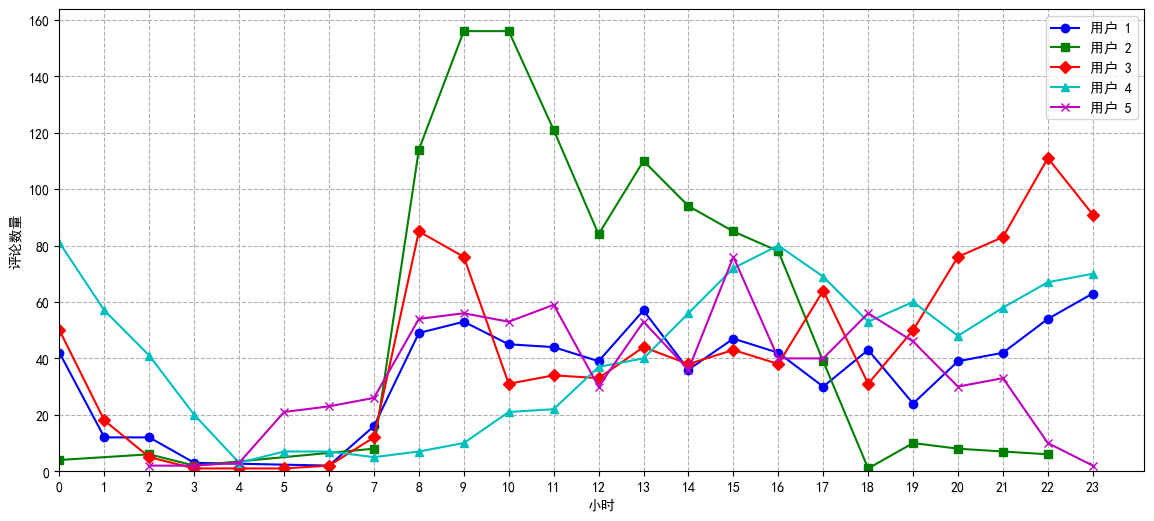

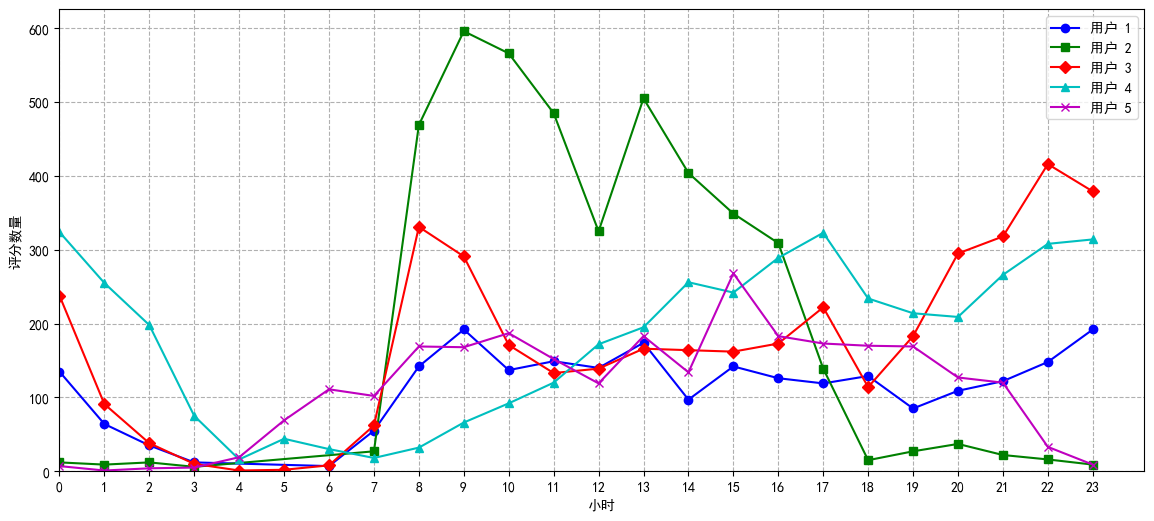

In [5]:
# 用户ID与数字的映射
user_mapping = {
    'b05ae0036abc8f113d7e491f502a7fa8': 1,
    '535e6f7ef1626bedd166e4dfa49bc0b4': 2,
    '425889580eb67241e5ebcd9f9ae8a465': 3,
    '3917c1b1b030c6d249e1a798b3154c43': 4,
    '27a0515251ae7b335fc40a6a01ba34c3': 5,
}

# 定义不同的点样式和颜色
styles = [
    {'marker': 'o', 'color': 'b', 'label': '用户 1'},
    {'marker': 's', 'color': 'g', 'label': '用户 2'},
    {'marker': 'D', 'color': 'r', 'label': '用户 3'},
    {'marker': '^', 'color': 'c', 'label': '用户 4'},
    {'marker': 'x', 'color': 'm', 'label': '用户 5'},
]

# 绘制评论数量的折线图
plt.figure(figsize=(14, 6))
for (user_id, label), style in zip(user_mapping.items(), styles):
    subset = comment_counts[comment_counts['USER_MD5'] == user_id]
    plt.plot(subset['COMMENT_HOUR'], subset['COMMENT_COUNT'], 
             marker=style['marker'], color=style['color'], 
             label=style['label'], linestyle='-' )

# plt.title('活跃度前五的用户的评论数量分布')
plt.xlabel('小时')
plt.ylabel('评论数量')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.xticks(range(24))  # x轴刻度显示0-23小时
plt.legend()
plt.grid(linestyle="--")
plt.show()

# 绘制评分数量的折线图
plt.figure(figsize=(14, 6))
for (user_id, label), style in zip(user_mapping.items(), styles):
    subset = rating_counts[rating_counts['USER_MD5'] == user_id]
    plt.plot(subset['RATING_HOUR'], subset['RATING_COUNT'], 
             marker=style['marker'], color=style['color'], 
             label=style['label'], linestyle='-')

# plt.title('活跃度前五的用户的评分数量分布')
plt.xlabel('小时')
plt.ylabel('评分数量')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.xticks(range(24))  # x轴刻度显示0-23小时
plt.legend()
plt.grid(linestyle="--")
plt.show()


In [6]:
import pandas as pd

# 首先创建 HOUR 字段
def select_hour(row):
    if pd.notnull(row['RATING_HOUR']):
        return row['RATING_HOUR']
    elif pd.notnull(row['COMMENT_HOUR']):
        return row['COMMENT_HOUR']
    return None

filtered_df['HOUR'] = filtered_df.apply(select_hour, axis=1)

# 定义时间段
def categorize_hour(hour):
    if hour >= 18 or hour < 6:
        return '18:00-5:00'
    else:
        return '6:00-17:00'

filtered_df['TIME_PERIOD'] = filtered_df['HOUR'].apply(categorize_hour)

# 按 USER_MD5、时间段和电影类型计算电影类型的数量分布
genre_distribution = (
    filtered_df
    .explode('GENRES')
    .groupby(['USER_MD5', 'TIME_PERIOD', 'GENRES'])
    .size()
    .reset_index(name='COUNT')  # 重置索引并为计数列命名
)

# 选择 USER_MD5, GENRES, TIME_PERIOD 和 COUNT 列
df_genre = genre_distribution[['USER_MD5', 'GENRES', 'TIME_PERIOD', 'COUNT']]

# 输出结果
df_genre

C:\Users\jhc\AppData\Local\Temp\ipykernel_18144\3668688123.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['HOUR'] = filtered_df.apply(select_hour, axis=1)
C:\Users\jhc\AppData\Local\Temp\ipykernel_18144\3668688123.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TIME_PERIOD'] = filtered_df['HOUR'].apply(categorize_hour)


,USER_MD5,GENRES,TIME_PERIOD,COUNT
0,27a0515251ae7b335fc40a6a01ba34c3,传记,18:00-5:00,19
1,27a0515251ae7b335fc40a6a01ba34c3,儿童,18:00-5:00,15
2,27a0515251ae7b335fc40a6a01ba34c3,冒险,18:00-5:00,43
3,27a0515251ae7b335fc40a6a01ba34c3,剧情,18:00-5:00,366
4,27a0515251ae7b335fc40a6a01ba34c3,动作,18:00-5:00,142
...,...,...,...,...
284,b05ae0036abc8f113d7e491f502a7fa8,科幻,6:00-17:00,80
285,b05ae0036abc8f113d7e491f502a7fa8,西部,6:00-17:00,6
286,b05ae0036abc8f113d7e491f502a7fa8,运动,6:00-17:00,1
287,b05ae0036abc8f113d7e491f502a7fa8,音乐,6:00-17:00,4


In [24]:
filtered_df

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,COMMENT_TIME,NAME,ACTORS,...,LANGUAGES,REGIONS,TOKENIZED_CONTENT,RATING_HOUR,COMMENT_HOUR,length,GENRES_unique,C,HOUR,TIME_PERIOD
368,1.941348e+09,27a0515251ae7b335fc40a6a01ba34c3,1291546,5.0,2019-09-06 10:17:52,1.941348e+09,好故事既让人陶醉，又让人流泪，这是一部永远不会过时的国产经典影片，霸王别姬看了三遍，看后心情...,2019-09-06 10:17:00,霸王别姬,"[张国荣, 张丰毅, 巩俐, 葛优, 英达, 蒋雯丽, 吴大维, 吕齐, 雷汉, 尹治, 马...",...,[汉语普通话],"[中国大陆 , 中国香港]",故事 陶醉 流泪 这是 一部 永远 过时 国产 经典影片 霸王别姬 三遍 看后 心情 郁闷 ...,10.0,10.0,92,"{'剧情', '同性', '爱情'}",0.577249,0,18:00-5:00
1408,3.611968e+08,3917c1b1b030c6d249e1a798b3154c43,1291554,2.0,2011-03-03 23:42:20,3.611968e+08,备忘Mark。其实剧情蛮傻的。,2011-03-03 23:42:00,歌剧魅影,"[杰拉德·巴特勒, 埃米·罗森, 帕特里克·威尔森, 米兰达·理查森, 明妮·德里弗, 塞伦...",...,"[英语 , 意大利语]","[英国 , 美国]",备忘 Mark 剧情 蛮 傻,23.0,23.0,13,"{'惊悚', '剧情', '音乐', '爱情'}",0.605287,0,18:00-5:00
1649,9.273979e+07,3917c1b1b030c6d249e1a798b3154c43,1291555,4.0,2009-02-02 05:54:19,NaN,NaN,NaT,2046,"[梁朝伟, 章子怡, 王菲, 木村拓哉, 巩俐, 刘嘉玲, 张震, 张曼玉, 董洁, 萧炳林...",...,"[粤语 , 汉语普通话 , 日语]","[香港 , 中国大陆 , 法国 , 意大利 , 德国]",NaN,5.0,NaN,0,"{'奇幻', '剧情', '爱情'}",0.605287,0,18:00-5:00
1890,5.729074e+07,3917c1b1b030c6d249e1a798b3154c43,1291556,5.0,2008-08-31 14:28:34,NaN,NaN,NaT,乡愁,"[奥列格·扬科夫斯基, 厄兰·约瑟夫森, 多美兹亚娜·佐丹奴, 劳拉·德·马奇, 德丽娅·布...",...,"[意大利语 , 俄语]","[苏联 , 意大利]",NaN,14.0,NaN,0,{'剧情'},0.605287,0,18:00-5:00
3774,3.554396e+08,3917c1b1b030c6d249e1a798b3154c43,1291566,3.0,2011-02-18 02:23:59,NaN,NaN,NaT,攻壳机动队2：无罪,"[田中敦子, 大塚明夫, 山寺宏一, 竹中直人, 榊原良子, 大木民夫]",...,"[日语 , 粤语]",[日本],NaN,2.0,NaN,0,"{'剧情', '科幻', '动画'}",0.605287,0,18:00-5:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229794,1.891795e+09,535e6f7ef1626bedd166e4dfa49bc0b4,34778464,1.0,2019-08-05 08:30:33,NaN,NaN,NaT,双世青蛇,"[南笙, 麻家铭, 董李无忧, 袁媛]",...,[汉语普通话],[中国大陆],NaN,8.0,NaN,0,"{'奇幻', '爱情'}",0.640749,0,18:00-5:00
4229949,1.897663e+09,535e6f7ef1626bedd166e4dfa49bc0b4,34779698,1.0,2019-08-09 09:01:52,1.897663e+09,废话连连看，演绎吓死人,2019-08-09 09:01:00,星际流浪,"[菊麟, 肖轶腾, 高梓刚, 白超]",...,[汉语普通话],[中国大陆],废话 连连看 演绎 吓死人,9.0,9.0,10,{'科幻'},0.640749,0,18:00-5:00
4230046,1.886909e+09,425889580eb67241e5ebcd9f9ae8a465,34781207,1.0,2019-08-04 10:17:41,NaN,NaN,NaT,海贼大冒险,[],...,[德语],[德国],NaN,10.0,NaN,0,"{'冒险', '动画', '动作'}",0.635399,0,18:00-5:00
4230057,1.917258e+09,535e6f7ef1626bedd166e4dfa49bc0b4,34781626,3.0,2019-08-20 10:27:50,NaN,NaN,NaT,外星入侵者ZIM：魔幻入口,[],...,[英语],[美国],NaN,10.0,NaN,0,"{'剧情', '动画'}",0.640749,0,18:00-5:00


In [47]:
filter_bool = [df_genre['USER_MD5'] == '27a0515251ae7b335fc40a6a01ba34c3',
               df_genre['GENRES'] == '恐怖']
df_genre[ (filter_bool[1])]

,USER_MD5,GENRES,TIME_PERIOD,COUNT,PERCENTAGE
12,27a0515251ae7b335fc40a6a01ba34c3,恐怖,18:00-5:00,75,1.330967
42,27a0515251ae7b335fc40a6a01ba34c3,恐怖,6:00-17:00,222,3.939663
73,3917c1b1b030c6d249e1a798b3154c43,恐怖,18:00-5:00,96,1.114465
104,3917c1b1b030c6d249e1a798b3154c43,恐怖,6:00-17:00,85,0.986766
134,425889580eb67241e5ebcd9f9ae8a465,恐怖,18:00-5:00,359,4.139760
165,425889580eb67241e5ebcd9f9ae8a465,恐怖,6:00-17:00,322,3.713100
193,535e6f7ef1626bedd166e4dfa49bc0b4,恐怖,18:00-5:00,36,0.404813
217,535e6f7ef1626bedd166e4dfa49bc0b4,恐怖,6:00-17:00,505,5.678624
247,b05ae0036abc8f113d7e491f502a7fa8,恐怖,18:00-5:00,799,19.243738
273,b05ae0036abc8f113d7e491f502a7fa8,恐怖,6:00-17:00,1121,26.999037


In [18]:
# 计算每个用户在每个时间段内的总计数
total_counts = df_genre.groupby(['USER_MD5', 'TIME_PERIOD'])['COUNT'].transform('sum')

# 计算每个用户、时间段和电影类型的百分比
df_genre['PERCENTAGE'] = df_genre['COUNT'] / total_counts

# 输出结果
print(df_genre[['USER_MD5', 'GENRES', 'TIME_PERIOD', 'COUNT', 'PERCENTAGE']])

                             USER_MD5 GENRES TIME_PERIOD  COUNT  PERCENTAGE
0    27a0515251ae7b335fc40a6a01ba34c3     传记  18:00-5:00     19    0.012346
1    27a0515251ae7b335fc40a6a01ba34c3     儿童  18:00-5:00     15    0.009747
2    27a0515251ae7b335fc40a6a01ba34c3     冒险  18:00-5:00     43    0.027940
3    27a0515251ae7b335fc40a6a01ba34c3     剧情  18:00-5:00    366    0.237817
4    27a0515251ae7b335fc40a6a01ba34c3     动作  18:00-5:00    142    0.092268
..                                ...    ...         ...    ...         ...
284  b05ae0036abc8f113d7e491f502a7fa8     科幻  6:00-17:00     80    0.032760
285  b05ae0036abc8f113d7e491f502a7fa8     西部  6:00-17:00      6    0.002457
286  b05ae0036abc8f113d7e491f502a7fa8     运动  6:00-17:00      1    0.000410
287  b05ae0036abc8f113d7e491f502a7fa8     音乐  6:00-17:00      4    0.001638
288  b05ae0036abc8f113d7e491f502a7fa8     鬼怪  6:00-17:00      3    0.001229

[289 rows x 5 columns]


C:\Users\jhc\AppData\Local\Temp\ipykernel_18144\1801785086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['PERCENTAGE'] = df_genre['COUNT'] / total_counts


C:\Users\jhc\AppData\Local\Temp\ipykernel_18144\2094756122.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['USER_ID_NUM'] = df_genre['USER_MD5'].map(user_mapping)


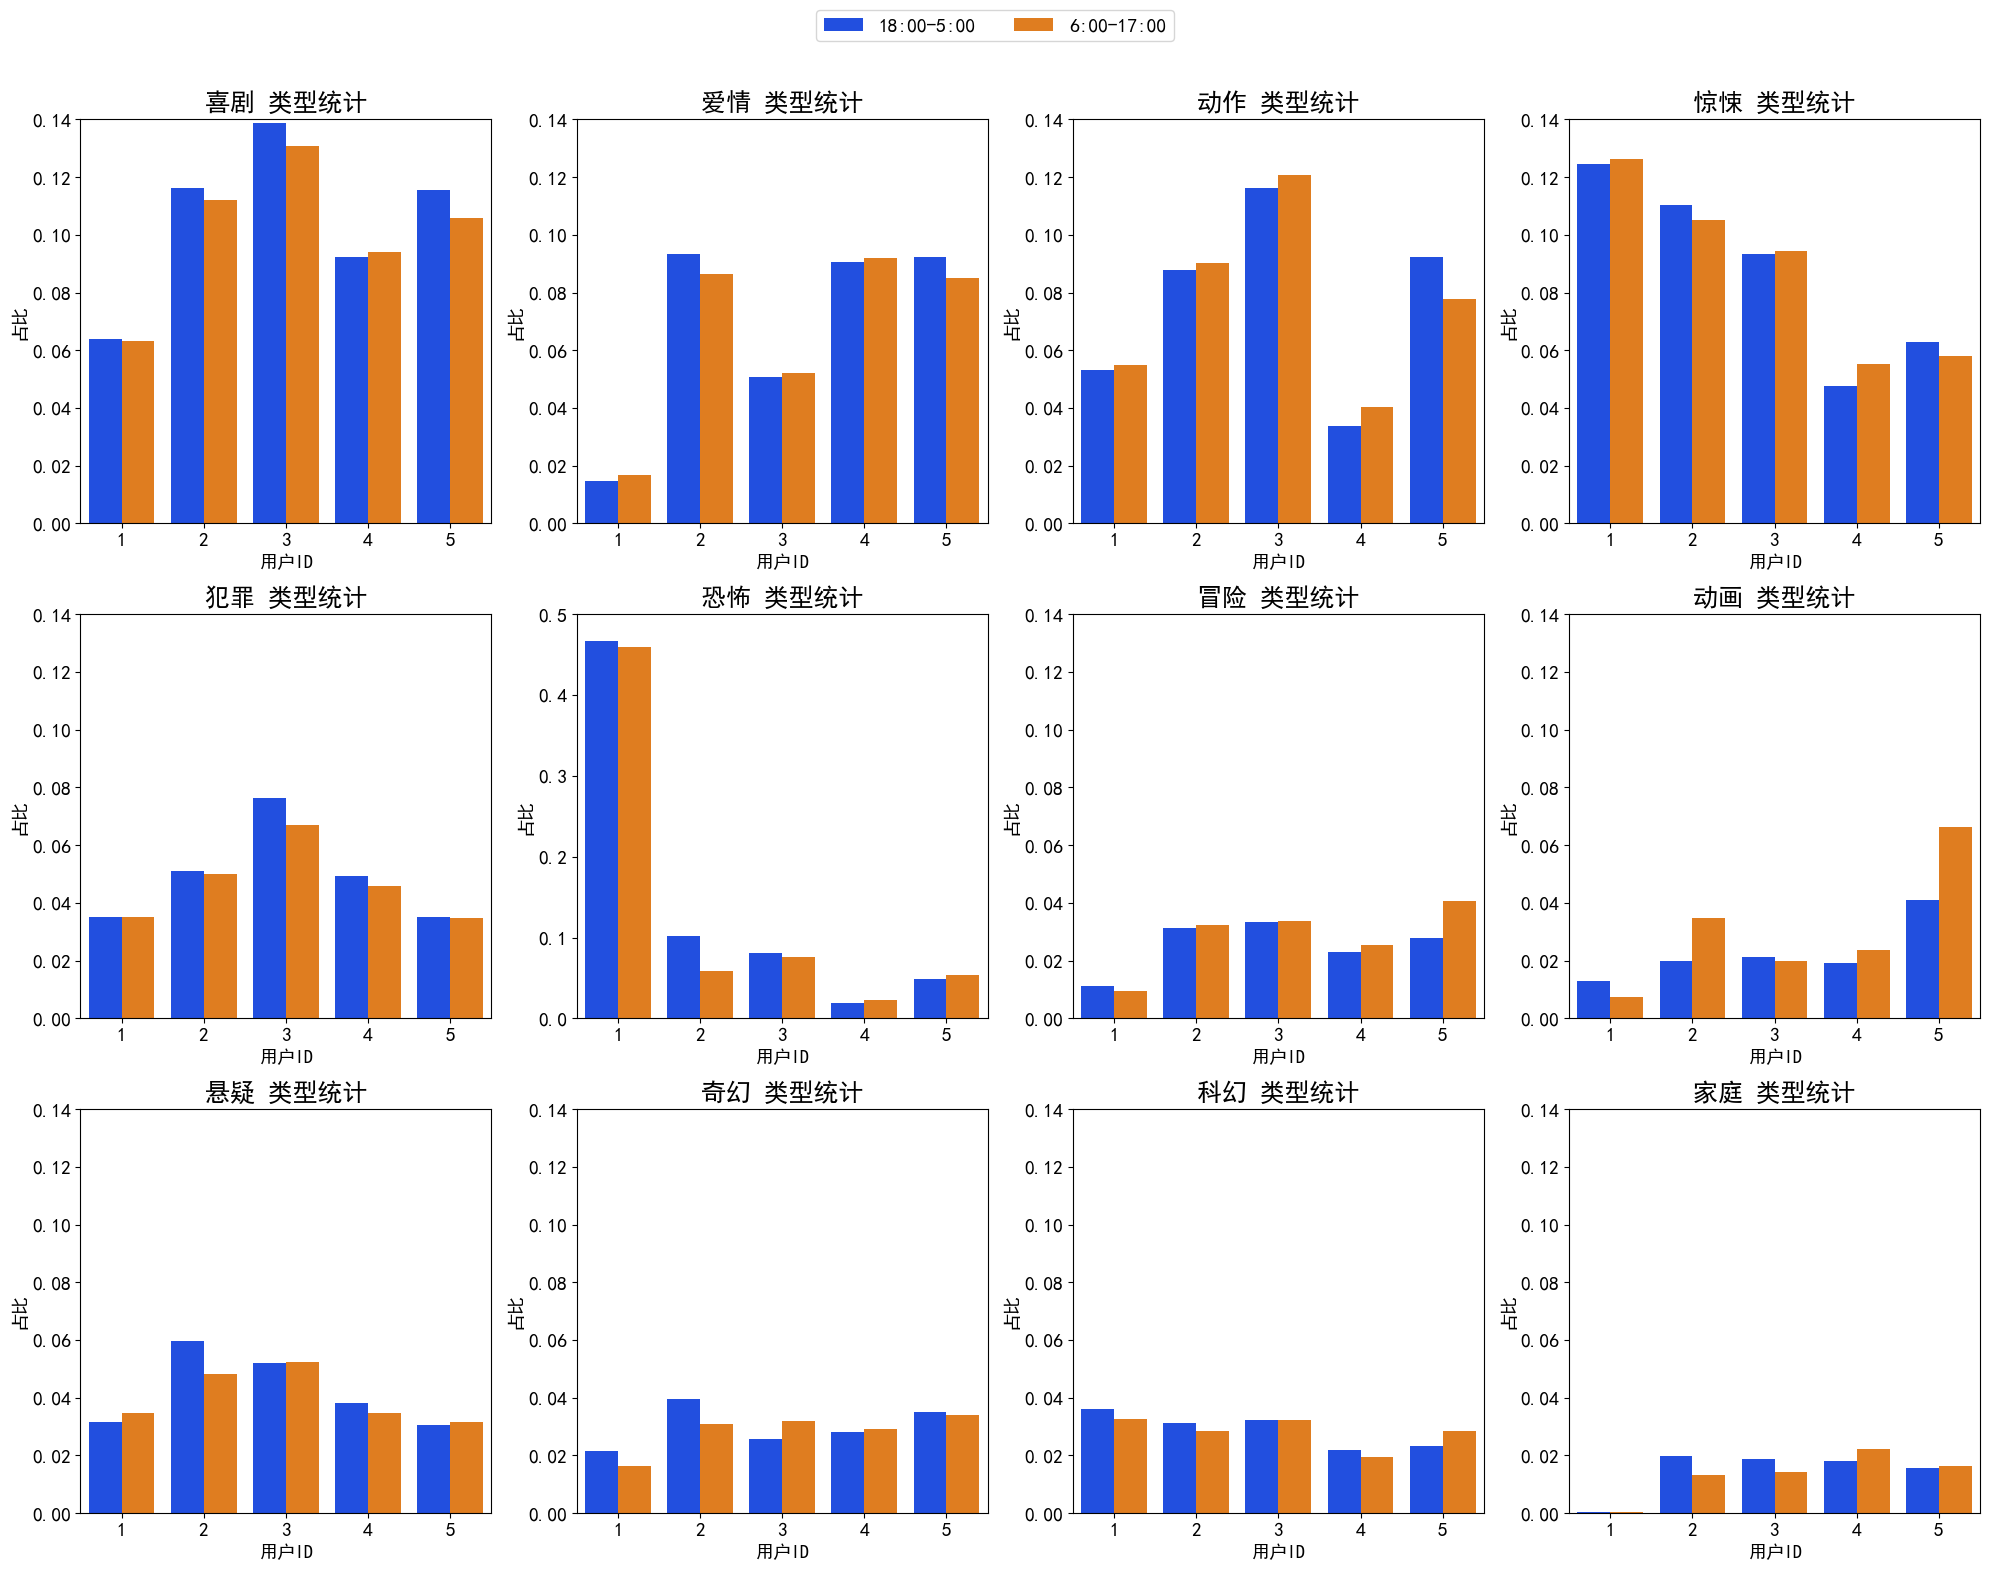

In [33]:
import seaborn as sns

# 设定类型列表
genres = ['喜剧', '爱情', '动作', '惊悚', '犯罪', '恐怖', 
          '冒险', '动画', '悬疑', '奇幻', '科幻', '家庭']

# 用户ID与数字的映射
user_mapping = {
    'b05ae0036abc8f113d7e491f502a7fa8': 1,
    '535e6f7ef1626bedd166e4dfa49bc0b4': 2,
    '425889580eb67241e5ebcd9f9ae8a465': 3,
    '3917c1b1b030c6d249e1a798b3154c43': 4,
    '27a0515251ae7b335fc40a6a01ba34c3': 5,
}

# 假设你已经定义了 df_genre 并生成了对应的 'USER_MD5' 和 'PERCENTAGE' 列
df_genre['USER_ID_NUM'] = df_genre['USER_MD5'].map(user_mapping)

# 设置画布和子图排列
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# 定义颜色调色板
palette = sns.color_palette("bright", len(df_genre['TIME_PERIOD'].unique()))

# 存储图例句柄和标签
handles = []
labels = []

# 设置统一的纵坐标范围
y_limits = (0, 0.14)  # 根据实际数据调整范围

# 绘制每个类型的柱形图
for idx, genre in enumerate(genres):
    # 筛选当前类型的数据
    genre_data = df_genre[df_genre['GENRES'] == genre]

    # 使用 seaborn 绘制柱形图
    bar_plot = sns.barplot(x='USER_ID_NUM', y='PERCENTAGE', hue='TIME_PERIOD', 
                           data=genre_data, ax=axes[idx], palette=palette, ci=None)
    
    # 获取图例句柄和标签
    if idx == 0:  # 只在第一个子图中收集图例
        handles, labels = bar_plot.get_legend_handles_labels()

    # 设置标题和标签
    axes[idx].set_title(genre + ' 类型统计', fontsize=18)
    axes[idx].set_xlabel('用户ID', fontsize=13)
    axes[idx].set_ylabel('占比', fontsize=13)

    # 设置纵坐标范围
    if genre == '恐怖':
        axes[idx].set_ylim(0, 0.5)  # 恐怖类型的纵坐标范围
    else:
        # 设置统一纵坐标范围
        axes[idx].set_ylim(y_limits)

    # 移除图例
    axes[idx].legend_.remove()

# 增大坐标轴刻度字体
for ax in axes:
    ax.tick_params(labelsize=14)  # 坐标轴刻度的字体大小

# 在上方添加整体图例并确保不与子图重叠
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(labels), fontsize=14)

# 调整布局，给子图腾出空间
plt.subplots_adjust(top=0.85)  # 为图例留出空间
plt.tight_layout()
plt.show()

# 文本情感分析

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 步骤 1: 筛选数据
df_filtered = df_all[(df_all['length']>5) & (df_all['length']<=150) & (df_all['C'] >= 0.018)]
df_filtered = df_filtered[['RATING', 'CONTENT', 'COMMENT_ID', 'TOKENIZED_CONTENT']]
# df_filtered = df_all[['RATING', 'CONTENT', 'COMMENT_ID', 'TOKENIZED_CONTENT']]
df_filtered = df_filtered[df_filtered['COMMENT_ID'].notnull()]
df_filtered

,RATING,CONTENT,COMMENT_ID,TOKENIZED_CONTENT
121,5.0,泪流满面……太感人了 相信你所相信的 爱你所爱的！父爱的伟大。,2.238914e+08,泪流满面 太 感人 爱 爱 父爱
125,5.0,哥特和亲情的融合..每个人心中都有一条大鱼，抱着梦想而活是最幸福的，怀抱梦想而死去的人是不朽...,3.648051e+07,哥特 亲情 融合 .. 心中 一条 大鱼 抱 梦想 而活 幸福 怀抱 梦想 死去 不朽 真相...
128,5.0,我用一生为你讲故事，你用一生成为我的故事。ps 这部电影让我沉溺于史蒂夫布西密的颜,1.513819e+09,我用 一生 讲故事 一生 故事 这部 电影 沉溺于 史蒂夫 布西 密 颜
132,5.0,在那个没有人悲伤的画面哭了出来。最后的理解已经太晚了，拿出一些看电影感叹亲情爱情的时间，去真...,3.480649e+08,悲伤 画面 哭 理解 太晚 拿出 电影 感叹 亲情 爱情 时间 做 事情 表达 关怀 生命 ...
133,4.0,即使闻名已久，即使多次地翻阅过几乎每张剧照，依然无法得知这是怎样一个故事直到真正地观赏影片本...,9.273033e+08,闻名 久 翻阅 每张 剧照 依然 得知 这是 故事 观赏 影片 小时候 童话 真的 长大 童...
...,...,...,...,...
4230001,3.0,没什么新意的时间陷阱,1.913587e+09,没什么 新意 时间 陷阱
4230002,2.0,类似一部西方的啥片子啊,1.934529e+09,类似 一部 西方 片子
4230014,1.0,无耻抄袭超时空传输，零分,1.898168e+09,无耻 抄袭 超时空 传输 零分
4230023,4.0,线别管什么抄袭，能做到这样已经不错了,1.906424e+09,线 抄袭 不错


In [5]:
num = 100
df_filtered[['CONTENT', 'RATING']][num:(num + 20)]

,CONTENT,RATING
320,这是一部讲父亲的电影，儿子对父亲从小时候的崇拜，长大后的怀疑，再到探寻，最后到再次认同，这其...,4.0
325,所有古老的童话和寓言故事里都含有黑色元素引人恐慌TimBurton的每一部作品都是这样。。主...,4.0
327,我们在现实世界中迷失，我们畏首畏尾，我们丢失了童年时代的欢愉梦想，而大鱼可以唤醒你灵魂深处的...,5.0
328,第一天，我给你讲了一个故事，故事里没有我。第二天，我给你讲了一个故事，故事里没有我。第三天，...,4.0
329,电影有个漂亮的结尾，一代人接着一代人，每个人都是故事本身，现实残酷吗？那么真理就像童话。愿我...,5.0
331,当你遇到一生的最爱时，时间会停顿，当时间重新恢复时，你得走得特别快，来弥补那些停顿的时光。仅...,5.0
333,其实，生命就像一部童话，你想让它真实还是想让它虚假这不重要，重要的是你想让它传奇亦或平淡，无...,5.0
335,真的是很奇妙的一部电影，看这部电影时，时逢和父亲冷战。电影里那个无所不能的大话王爸爸，与我，...,3.0
336,值得一看，还不错,4.0
339,温暖感人的父子情，片中父亲童话般的人生故事直到最后自己成为其中的一部分，对于事实我更加喜欢童...,4.0


In [68]:
df_filtered.to_csv("../../数据集/处理后的数据集/emotion_C4.csv", index=False)

In [66]:
df_filtered[(df_filtered['COMMENT_ID'].notnull()) 
            & (df_filtered['RATING'].isnull()) 
            & (df_filtered['TOKENIZED_CONTENT'].notnull())
            & (~df_filtered['TOKENIZED_CONTENT'].str.contains(r'[a-zA-Z]', na=False))]

,RATING,CONTENT,COMMENT_ID,TOKENIZED_CONTENT
1362,NaN,没有42年的好看,9.685262e+06,42 年 好看
1382,NaN,当初看小说就对剧情无感，看了电影依旧无感。倒是道具啊服装啊布景啊唱段啊都还不错，很加分。下面...,6.101319e+08,当初 小说 剧情 无感 电影 依旧 无感 倒 道具 服装 布景 唱段 不错 很加分 几篇 评论 挺
1451,NaN,那个很鬼魅的插曲和片尾曲是不是柯南里面经常用？,4.944669e+08,鬼魅 插曲 片尾曲 柯南
1498,NaN,摘下残缺的面具往往比真实的脸更令爱情动容,1.040823e+08,摘下 残缺 面具 真实 脸 更令 爱情 动容
5429,NaN,莫名我就仇恨你！因为史莱克长得像妇科辉！！,5.207610e+08,莫名 仇恨 史莱克 长得 妇科 辉
...,...,...,...,...
4228388,NaN,补记。央视2019.6.18下午两点过九分首播,1.829633e+09,补记 央视 2019.6 18 下午 两点 九分 首播
4228883,NaN,纯沙雕片，哈哈哈，恶趣味集锦。,1.898700e+09,纯 沙雕 片 哈哈哈 恶趣味 集锦
4229291,NaN,包龙图开封，李易祥鲍振江洛城父子洛阳，李振伟郑州爱情故事郑州，霍猛,1.886623e+09,包龙图 开封 李易祥 鲍振江 洛城 父子 洛阳 李振伟 郑州 爱情故事 郑州 霍猛
4229527,NaN,小成本片，硬生生的把T客纳衬搬到了海女主部分演出了}的那一部分，其他人表演一塌糊T所有人的f...,1.883186e+09,成本 片 硬生生 客纳衬 搬 海女主 演出 一部分 其他人 表演 一塌糊 所有人 力 槭 颤


In [67]:
df_filtered[
    (df_filtered['COMMENT_ID'].notnull()) &
    (df_filtered['RATING'].notnull()) &
    (df_filtered['TOKENIZED_CONTENT'].notnull()) &
    (~df_filtered['TOKENIZED_CONTENT'].str.contains(r'[a-zA-Z]', na=False))
]

,RATING,CONTENT,COMMENT_ID,TOKENIZED_CONTENT
121,5.0,泪流满面……太感人了 相信你所相信的 爱你所爱的！父爱的伟大。,2.238914e+08,泪流满面 太 感人 爱 爱 父爱
125,5.0,哥特和亲情的融合..每个人心中都有一条大鱼，抱着梦想而活是最幸福的，怀抱梦想而死去的人是不朽...,3.648051e+07,哥特 亲情 融合 .. 心中 一条 大鱼 抱 梦想 而活 幸福 怀抱 梦想 死去 不朽 真相...
128,5.0,我用一生为你讲故事，你用一生成为我的故事。ps 这部电影让我沉溺于史蒂夫布西密的颜,1.513819e+09,我用 一生 讲故事 一生 故事 这部 电影 沉溺于 史蒂夫 布西 密 颜
132,5.0,在那个没有人悲伤的画面哭了出来。最后的理解已经太晚了，拿出一些看电影感叹亲情爱情的时间，去真...,3.480649e+08,悲伤 画面 哭 理解 太晚 拿出 电影 感叹 亲情 爱情 时间 做 事情 表达 关怀 生命 ...
133,4.0,即使闻名已久，即使多次地翻阅过几乎每张剧照，依然无法得知这是怎样一个故事直到真正地观赏影片本...,9.273033e+08,闻名 久 翻阅 每张 剧照 依然 得知 这是 故事 观赏 影片 小时候 童话 真的 长大 童...
...,...,...,...,...
4230001,3.0,没什么新意的时间陷阱,1.913587e+09,没什么 新意 时间 陷阱
4230002,2.0,类似一部西方的啥片子啊,1.934529e+09,类似 一部 西方 片子
4230014,1.0,无耻抄袭超时空传输，零分,1.898168e+09,无耻 抄袭 超时空 传输 零分
4230023,4.0,线别管什么抄袭，能做到这样已经不错了,1.906424e+09,线 抄袭 不错


# 时间特征分析2

In [ ]:
# 将 RATING_TIME 和 COMMENT_TIME 列转换为 datetime 类型
df_all['RATING_TIME'] = pd.to_datetime(df_all['RATING_TIME'])
df_all['COMMENT_TIME'] = pd.to_datetime(df_all['COMMENT_TIME'])

# 获取对应的星期几（英文）
df_all['RATING_DAY'] = df_all['RATING_TIME'].dt.day_name()
df_all['COMMENT_DAY'] = df_all['COMMENT_TIME'].dt.day_name()

# 创建一个映射字典
day_mapping = {
    'Monday': '星期一',
    'Tuesday': '星期二',
    'Wednesday': '星期三',
    'Thursday': '星期四',
    'Friday': '星期五',
    'Saturday': '星期六',
    'Sunday': '星期天'
}
df_all['RATING_DAY'] = df_all['RATING_DAY'].map(day_mapping)
df_all['COMMENT_DAY'] = df_all['COMMENT_DAY'].map(day_mapping)
# 融合 RATING_DAY 和 COMMENT_DAY
df_all['week'] = np.where(df_all['RATING_DAY'].isnull(), df_all['COMMENT_DAY'], df_all['RATING_DAY'])
df_all = df_all.drop(labels=['RATING_DAY', 'COMMENT_DAY'], axis=1)
df_all

C:\Users\jhc\AppData\Local\Temp\ipykernel_5876\773219970.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['RATING_TIME'] = pd.to_datetime(df_all['RATING_TIME'])


In [18]:
df_all

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,COMMENT_TIME,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS,RATING_HOUR,COMMENT_HOUR,length,C,week,HOUR
0,1.941952e+09,018b88b05ec053e03acf97920e641115,1291544,5.0,2019-09-06 20:19:04,NaN,NaN,NaT,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",20.0,NaN,0,0.000000,星期五,20.0
1,1.940096e+09,0617937403be10c1b6962686e97198b5,1291544,5.0,2019-09-05 08:44:38,NaN,NaN,NaT,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",8.0,NaN,0,0.000000,星期四,8.0
2,1.941972e+09,08723142276d403448980d73b1eb6e78,1291544,4.0,2019-09-06 20:40:57,NaN,NaN,NaT,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",20.0,NaN,0,0.000000,星期五,20.0
3,1.940079e+09,0ac1940db193217a5351d957ac06e7e1,1291544,4.0,2019-09-05 08:16:52,NaN,NaN,NaT,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",8.0,NaN,0,0.000000,星期四,8.0
4,1.938949e+09,0ae3d72e2c2164f5060b17226b6f5710,1291544,5.0,2019-09-04 10:00:22,NaN,NaN,NaT,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",10.0,NaN,0,0.000000,星期三,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230098,1.917904e+09,8e29154e90cfea1e5a291815a81bdc6f,34782320,3.0,2019-08-20 18:57:42,NaN,NaN,NaT,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],18.0,NaN,0,0.000000,星期二,18.0
4230099,1.920864e+09,a3911cd0925a298a8f6c23fd73240b20,34782320,1.0,2019-08-22 20:44:35,NaN,NaN,NaT,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],20.0,NaN,0,0.000000,星期四,20.0
4230100,1.916191e+09,a8dec3dc19b0a730d99e1affe5bce64f,34782320,1.0,2019-08-19 16:42:50,NaN,NaN,NaT,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],16.0,NaN,0,0.022849,星期一,16.0
4230101,1.915868e+09,c57f355b1b45db04d2a2a1f7f8b5b083,34782320,3.0,2019-08-19 12:47:06,NaN,NaN,NaT,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],12.0,NaN,0,0.000946,星期一,12.0


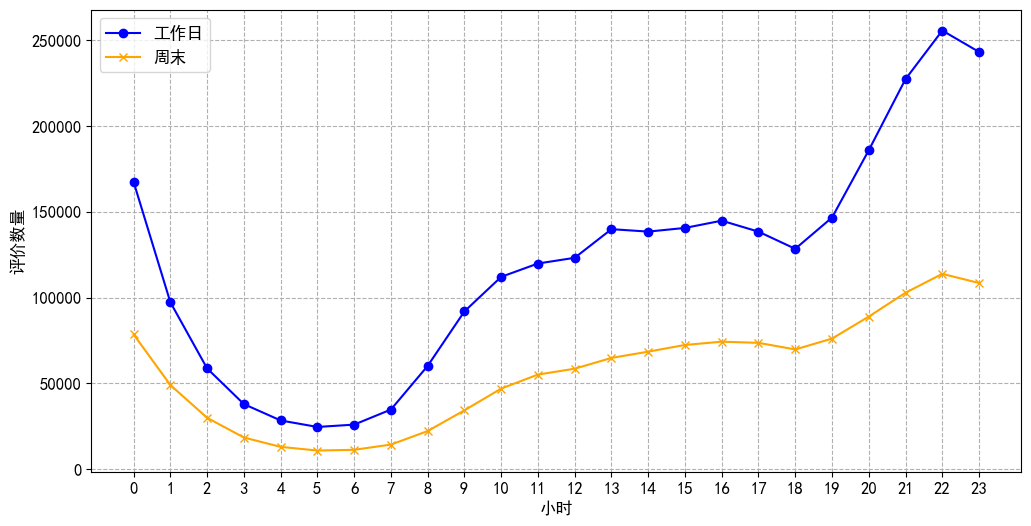

In [ ]:
# 首先，我们确保 HOUR 列是整数类型，方便后续分组
df_all['HOUR'] = df_all['HOUR'].astype(int)

# 将数据分为工作日和周末

workdays = df_all[df_all['week'].isin(['星期一', '星期二', '星期三', '星期四', '星期五'])]
weekend = df_all[df_all['week'].isin(['星期六', '星期天'])]

# 统计工作日各小时的数量
workdays_count = workdays.groupby('HOUR').size().reset_index(name='count')
# 统计周末各小时的数量
weekend_count = weekend.groupby('HOUR').size().reset_index(name='count')

# 绘制折线图
plt.figure(figsize=(12, 6))

# 绘制工作日数据的折线
plt.plot(workdays_count['HOUR'], workdays_count['count'], label='工作日', marker='o', color='blue')

# 绘制周末数据的折线
plt.plot(weekend_count['HOUR'], weekend_count['count'], label='周末', marker='x', color='orange')

# 添加标题和标签
# plt.title('各小时段用户评价数量统计')
plt.xlabel('小时', fontsize=12)
plt.ylabel('评价数量', fontsize=12)
plt.xticks(range(0, 24), fontsize=12) # 设置横坐标为0到23小时
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(linestyle="--")

# 显示图表
plt.show()


# 文本评论

In [76]:
df_content = df_all[(df_all['length'] > 6) & (df_all['length'] < 200) & (df_all['RATING_ID'].notnull()) & (df_all['C'] > 0.001)]

# 统计每个 MOVIE_ID 出现的次数
movie_counts = df_content['MOVIE_ID'].value_counts()
popular_ids = movie_counts[movie_counts >= 10].index
df_content = df_content[df_content['MOVIE_ID'].isin(popular_ids)]

df_content = df_content[['MOVIE_ID', 'NAME', 'RATING', 'CONTENT', 'TOKENIZED_CONTENT', 'GENRES']]
df_content = df_content.reset_index(drop=True)
df_content

,MOVIE_ID,NAME,RATING,CONTENT,TOKENIZED_CONTENT,GENRES
0,1291545,大鱼,5.0,泪流满面……太感人了 相信你所相信的 爱你所爱的！父爱的伟大。,泪流满面 太 感人 爱 爱 父爱,"[剧情, 家庭, 奇幻, 冒险]"
1,1291545,大鱼,5.0,哥特和亲情的融合..每个人心中都有一条大鱼，抱着梦想而活是最幸福的，怀抱梦想而死去的人是不朽...,哥特 亲情 融合 .. 心中 一条 大鱼 抱 梦想 而活 幸福 怀抱 梦想 死去 不朽 真相...,"[剧情, 家庭, 奇幻, 冒险]"
2,1291545,大鱼,5.0,我用一生为你讲故事，你用一生成为我的故事。ps 这部电影让我沉溺于史蒂夫布西密的颜,我用 一生 讲故事 一生 故事 这部 电影 沉溺于 史蒂夫 布西 密 颜,"[剧情, 家庭, 奇幻, 冒险]"
3,1291545,大鱼,5.0,在那个没有人悲伤的画面哭了出来。最后的理解已经太晚了，拿出一些看电影感叹亲情爱情的时间，去真...,悲伤 画面 哭 理解 太晚 拿出 电影 感叹 亲情 爱情 时间 做 事情 表达 关怀 生命 ...,"[剧情, 家庭, 奇幻, 冒险]"
4,1291545,大鱼,4.0,即使闻名已久，即使多次地翻阅过几乎每张剧照，依然无法得知这是怎样一个故事直到真正地观赏影片本...,闻名 久 翻阅 每张 剧照 依然 得知 这是 故事 观赏 影片 小时候 童话 真的 长大 童...,"[剧情, 家庭, 奇幻, 冒险]"
...,...,...,...,...,...,...
381733,34779698,星际流浪,1.0,无耻抄袭超时空传输，零分,无耻 抄袭 超时空 传输 零分,[科幻]
381734,34779698,星际流浪,1.0,看过超时空传输 ARQ再看这个就没那么惊艳了，另外都是中国人演着演着突然飙英文，你尴尬不尴尬？,看过 超时空 传输 ARQ 没 惊艳 中国 人演 演着 飙 英文 尴尬 尴尬,[科幻]
381735,34779698,星际流浪,4.0,线别管什么抄袭，能做到这样已经不错了,线 抄袭 不错,[科幻]
381736,34779698,星际流浪,1.0,尴尬，一个白人都说中文，你个说普通话的黄皮肤非要中英双语,尴尬 白人 说 中文 说 普通话 黄皮肤 非要 中 英双语,[科幻]


In [ ]:
# df_content.to_csv("../../数据集/处理后的数据集/content_analyse_C4.csv", index=False)

In [52]:
df_content[(df_content['NAME'] == '肖申克的救赎')][['CONTENT', 'RATING', 'TOKENIZED_CONTENT']][10:30]

,CONTENT,RATING,TOKENIZED_CONTENT
2982,我知道向往自由是人的本性，在艰苦的环境之中怎样与自己抗争不人云亦云是多么可贵。,4.0,向往 自由 本性 艰苦 环境 之中 抗争 人云亦云 可贵
2983,人的生命不过是从一个洞穴通往另一个世界..然后在那个世界的雨中继续颤抖.i hope,4.0,生命 是从 洞穴 通往 世界 .. 世界 雨 中 颤抖 hope
2984,不行了，我必须把五星改成四星！没有史蒂芬金的原著，这电影TMD啥也不是！,4.0,不行 五星 改成 四星 史蒂芬 金 原著 电影 TMD
2985,我们无所谓的活着 往往忽略了自由的可贵,4.0,无所谓 活着 忽略 自由 可贵
2986,直到现在也无法忘怀。,5.0,直到现在 忘怀
2987,自我救赎才是唯一的出口。感叹于知识改变命运啊。,5.0,自我 救赎 唯一 出口 感叹 知识 改变命运
2988,人的信念真的太强大，只要想做，而且坚持，总有一天会实现。知识的力量也是很强大的。看完这部电影...,5.0,信念 真的 太强大 想 做 总有一天 知识 力量 强大 完 这部 电影 感觉 美好 生活 充...
2989,好看但这么高的分有点假了吧，如果和越狱比起来，还是越狱好看些！,3.0,好看 高 分 假 越狱 越狱 好看
2990,何为救赎？只有重燃人们心中的希望才能救赎。有希望才有一切可能。即使环境再恶劣，安迪都没有放弃...,5.0,何为 救赎 重燃 心中 希望 救赎 希望 环境 恶劣 安迪 放弃 坚持不懈 写信 换来 更好...
2991,Hope is a good thing.,5.0,Hope good
